# Project I ML 
### Yahia Ehab Mohamed 7037125
### Ahmed Shehata 7005537

## Data Preparation

In [57]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('Dataset_ML/Train.csv')
test_data = pd.read_csv('Dataset_ML/Test.csv')

## Data Exploration

### Explore Data Set

In [58]:
train_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner


In [59]:
test_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### Check For Missing Values

In [60]:
train_data.info()

train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           8128 non-null   object
 1   year           8128 non-null   int64 
 2   selling_price  8128 non-null   int64 
 3   km_driven      8128 non-null   int64 
 4   fuel           8128 non-null   object
 5   seller_type    8128 non-null   object
 6   transmission   8128 non-null   object
 7   owner          8128 non-null   object
dtypes: int64(3), object(5)
memory usage: 508.1+ KB


,year,selling_price,km_driven
count,8128.000000,8.128000e+03,8.128000e+03
mean,2013.804011,6.382718e+05,6.981951e+04
std,4.044249,8.062534e+05,5.655055e+04
min,1983.000000,2.999900e+04,1.000000e+00
25%,2011.000000,2.549990e+05,3.500000e+04
50%,2015.000000,4.500000e+05,6.000000e+04
75%,2017.000000,6.750000e+05,9.800000e+04
max,2020.000000,1.000000e+07,2.360457e+06


In [61]:
test_data.info()

test_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


## Linear Regression

### Model Setup

In [62]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()

#Gradient Descent
from sklearn.linear_model import SGDRegressor
model_sgd = SGDRegressor(random_state=0) #ASK : What is random_state? ADN Should it be 0 ?

#### Data Split

In [63]:
x = train_data[['year','km_driven']]
y = train_data['selling_price']

x_test = test_data[['year','km_driven']]
y_test = test_data['selling_price']

### Multi-Feature Equation

#### Train

In [64]:
model_LR.fit(x,y)

model_LR.coef_

array([ 7.72572326e+04, -9.05960838e-01])

#### Test

In [65]:
yPred_LR = model_LR.predict(x_test)

yPred_LR

array([112449.24460605, 130568.46136951, 471556.58239928, ...,
       255186.21888515, 789645.12113178, 834943.16304046])

#### Accuracy Comparison

In [66]:
#RMSE & MSE
from sklearn.metrics import mean_squared_error
mse_LR = mean_squared_error(y_test,yPred_LR)
rmse_LR = np.sqrt(mse_LR)
print("MSE: ",mse_LR)
print("RMSE: ",rmse_LR)

#MAE
from sklearn.metrics import mean_absolute_error
mae_LR = mean_absolute_error(y_test,yPred_LR)
print("MAE: ",mae_LR)

MSE:  295442853491.8598
RMSE:  543546.5513567902
MAE:  331137.17405774497


### Gradient Descent

#### Train

In [67]:
model_sgd.fit(x,y)

model_sgd.coef_

array([-2.33258172e+13,  1.40839730e+13])

#### Test

In [68]:
yPred_GD = model_sgd.predict(x_test)

yPred_GD

array([9.39063183e+17, 6.57383723e+17, 1.36146574e+18, ...,
       1.12210818e+18, 1.22053271e+18, 5.16334061e+17])

#### Accuracy Comparison

In [69]:
#RMSE & MSE
from sklearn.metrics import mean_squared_error
mse_GD = mean_squared_error(y_test,yPred_GD)
rmse_GD = np.sqrt(mse_GD)
print("MSE: ",mse_GD)
print("RMSE: ",rmse_GD)

#MAE
from sklearn.metrics import mean_absolute_error
mae_GD= mean_absolute_error(y_test,yPred_GD)

print("MAE: ",mae_GD)

MSE:  1.215847681438471e+36
RMSE:  1.1026548333175123e+18
MAE:  8.864233867097068e+17


## Polynomial Regression

### Model Setup

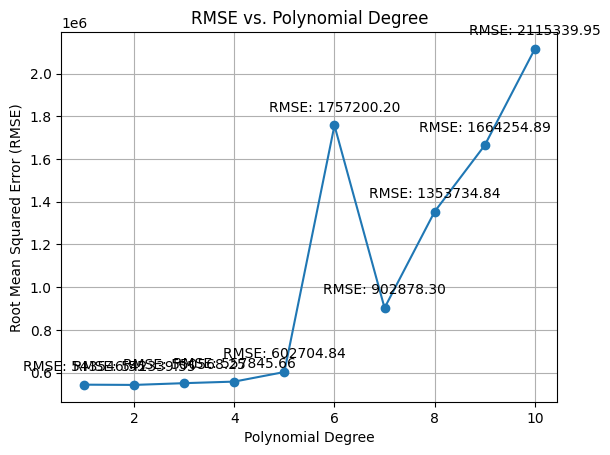

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have x, x_test, y, and y_test defined
# Make sure to load your data before using this code

# Initialize empty lists to store RMSE values and degrees
rmse_values = []
degrees = list(range(1, 11))

for i in degrees:
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(x)
    x_test_poly = poly.transform(x_test)
    model_poly = LinearRegression()
    model_poly.fit(x_poly, y)
    yPred_poly = model_poly.predict(x_test_poly)
    mse_poly = mean_squared_error(y_test, yPred_poly)
    rmse_poly = np.sqrt(mse_poly)
    rmse_values.append(rmse_poly)

# Create a plot to visualize the relationship between model degree and RMSE
plt.figure()
plt.plot(degrees, rmse_values, marker='o')
plt.title("RMSE vs. Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.grid(True)
plt.show()
